## White Wine Quality Prediction

Given *data about various white wines*, let's try to predict the **quality** of a particular wine, according to experts.

We will use a Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/piyushagni5/white-wine-quality

### Getting Started

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('archive/winequality-white.csv', delimiter=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Visualization

In [4]:
df = data.copy()

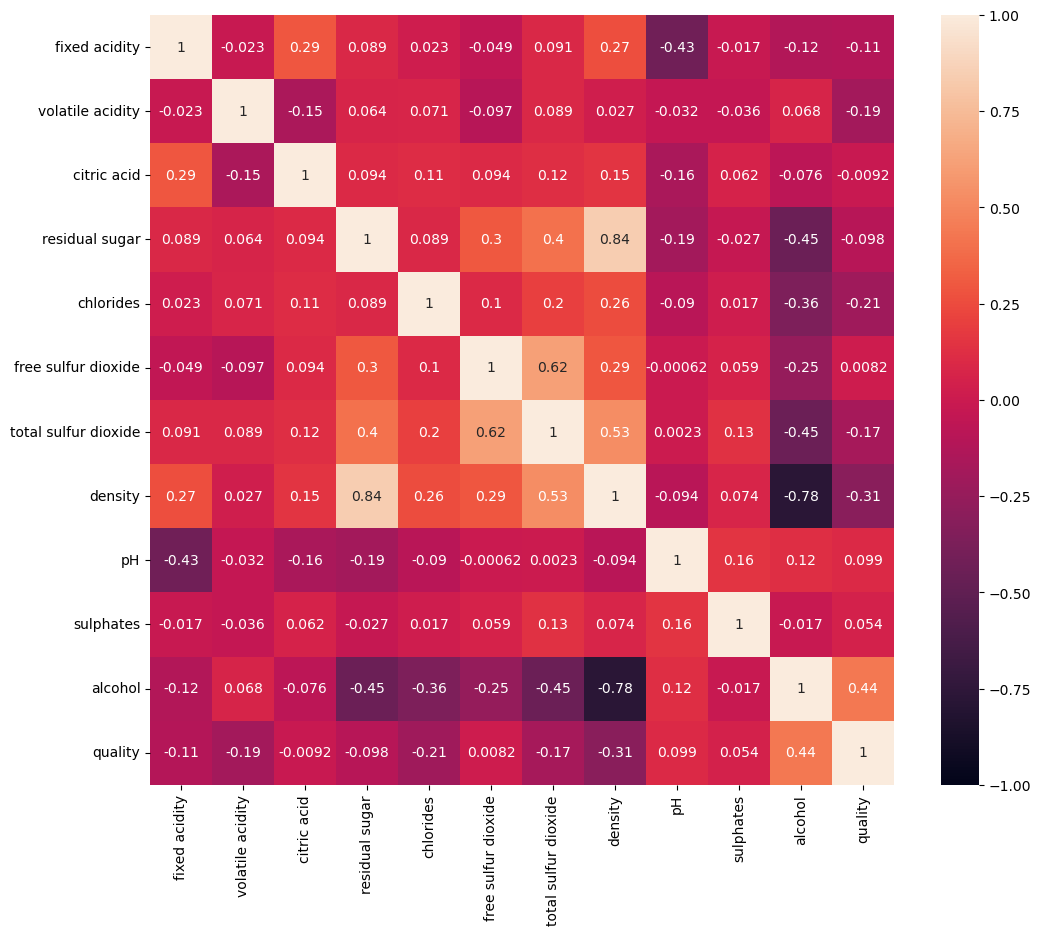

In [5]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

### Preprocessing

In [6]:
print("Total null values: ", df.isna().sum().sum())

Total null values:  0


In [7]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [8]:
encoder = LabelEncoder()

df['quality'] = encoder.fit_transform(df['quality'])

{index: label for index, label in enumerate(encoder.classes_)}

{0: np.int64(3),
 1: np.int64(4),
 2: np.int64(5),
 3: np.int64(6),
 4: np.int64(7),
 5: np.int64(8),
 6: np.int64(9)}

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,3
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,3
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,3
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,3
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,3
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,4


In [10]:
y = df['quality']
X = df.drop('quality', axis=1)

In [11]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [12]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=34)

### Modeling and Training

In [14]:
num_features = X.shape[1]
num_features

11

In [15]:
num_classes = len(y.unique())
num_classes

7

In [16]:
inputs = tf.keras.Input(shape=(num_features, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4675 - loss: 1.4462 - val_accuracy: 0.5044 - val_loss: 1.2242 - learning_rate: 0.0010
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5518 - loss: 1.1523 - val_accuracy: 0.5073 - val_loss: 1.1508 - learning_rate: 0.0010
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5540 - loss: 1.1009 - val_accuracy: 0.5262 - val_loss: 1.1220 - learning_rate: 0.0010
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5722 - loss: 1.0690 - val_accuracy: 0.5262 - val_loss: 1.1075 - learning_rate: 0.0010
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5675 - loss: 1.0501 - val_accuracy: 0.5277 - val_loss: 1.1020 - learning_rate: 0.0010
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5682 - loss: 1.0365 - val_accuracy: 0.5408 - val_loss: 1.0848 - learning_rate: 0.0010
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5759 - loss: 1.0268 - val_acc

### Results

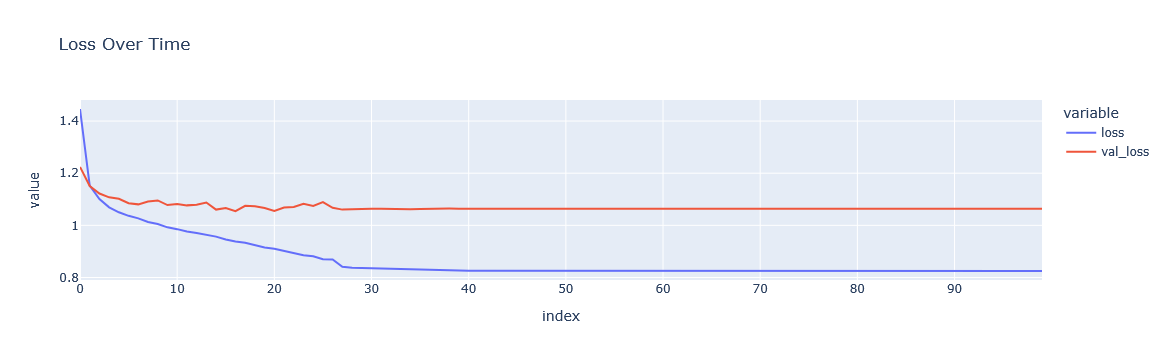

In [17]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'x': 'Epoch', 'y': 'Loss'},
    title='Loss Over Time'
)
fig.show()

In [18]:
model.evaluate(X_test, y_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5687 - loss: 1.0171


[1.0170913934707642, 0.5687074661254883]

In [19]:
y.value_counts()

quality
3    2198
2    1457
4     880
5     175
1     163
0      20
6       5
Name: count, dtype: int64

### Re-Structure the task:

Let's try quantile-splitting the outputs into two categories: high quality wines and low quality wines.

In [20]:
pd.qcut(df['quality'], q=2, labels=[0,1]).value_counts()

quality
0    3838
1    1060
Name: count, dtype: int64

In [21]:
y = pd.qcut(df['quality'], q=2, labels=[0,1])
X = df.drop('quality', axis=1)

In [22]:
y = y.astype(int)
y

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: int64

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=34)

In [25]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1897,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9
4278,5.6,0.18,0.29,2.3,0.040,5.0,47.0,0.99126,3.07,0.45,10.1
4592,6.7,0.45,0.30,5.3,0.036,27.0,165.0,0.99122,3.12,0.46,12.2
4206,5.9,0.32,0.20,14.4,0.050,29.0,144.0,0.99666,3.24,0.41,10.3
3196,6.4,0.22,0.38,9.1,0.044,35.0,127.0,0.99326,2.97,0.30,11.0
...,...,...,...,...,...,...,...,...,...,...,...
324,8.3,0.41,0.51,2.0,0.046,11.0,207.0,0.99300,3.02,0.55,11.4
3157,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
3830,4.8,0.26,0.23,10.6,0.034,23.0,111.0,0.99274,3.46,0.28,11.5
2538,5.9,0.28,0.14,8.6,0.032,30.0,142.0,0.99542,3.28,0.44,9.5


In [26]:
y_train

1897    0
4278    0
4592    0
4206    0
3196    1
       ..
324     0
3157    1
3830    1
2538    0
3489    1
Name: quality, Length: 3428, dtype: int64

In [27]:
inputs = tf.keras.Input(shape=(num_features, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7126 - loss: 1.7155 - val_accuracy: 0.7478 - val_loss: 0.5261
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7874 - loss: 0.4940 - val_accuracy: 0.7478 - val_loss: 0.5410
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7870 - loss: 0.4772 - val_accuracy: 0.7493 - val_loss: 0.5194
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7892 - loss: 0.4748 - val_accuracy: 0.7493 - val_loss: 0.5191
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7750 - loss: 0.5081 - val_accuracy: 0.7478 - val_loss: 0.7593
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7881 - loss: 0.4738 - val_accuracy: 0.7478 - val_loss: 0.5930
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7943 - loss: 0.4650 - val_accuracy: 0.7405 - val_loss: 0.5403
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7819 - loss: 0.4895 - val_accuracy: 0.7464 - v

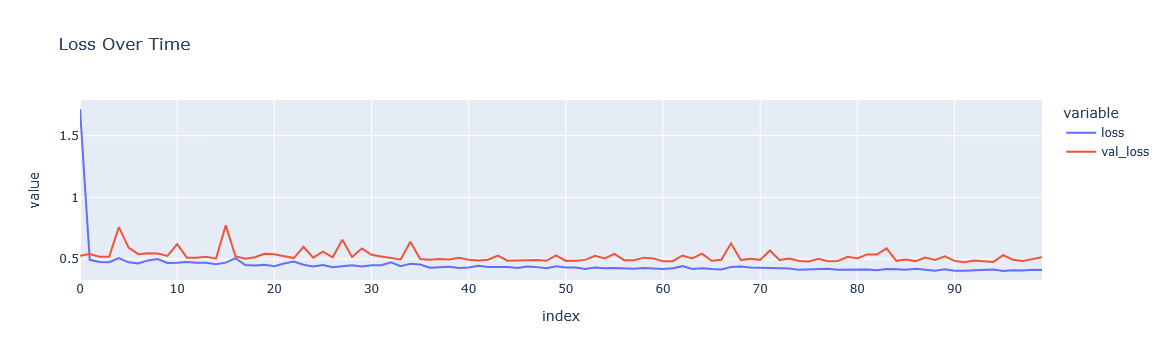

In [28]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'x': 'Epoch', 'y': 'Loss'},
    title='Loss Over Time'
)
fig.show()

In [29]:
model.evaluate(X_test, y_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7973 - loss: 0.4642


[0.4641750752925873, 0.7972789406776428]